### Outline

1. Import libraries
2. Import data (pandas)
3. Work with data
 * Normalise
 * See if we need to use all the collumns
4. Define model (e.g. Linear Regression)
4. Define Loss and gradient
5. Train
6. Test on val
7. Improve

*Tip*
- you could implement k_fold validation **if you guys want**

In [ ]:
from typing import Tuple, List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helpers

import plotly.graph_objects as go


In [ ]:
df_train = pd.read_csv('Data/train_set.csv')
df_val = pd.read_csv('Data/val_set.csv')
df_test = pd.read_csv('Data/test_set.csv')

# Separation so lil brain understands data
target = ['sat1_col']
non_period_features = ['sa_avg', 'da5_75', 'da5_95', 'fiv3', 'sa_ratio']
raw_period_features = [e for e in df_train.columns if e not in non_period_features]

# Data separation
#X_train = df_train[["1.3"] + non_period_features].to_numpy()
#y_train = df_train[target].to_numpy()
X_train = df_train[["1.3" ] + ["2.6"] + ["6.5"] + non_period_features + target].to_numpy()
X_val = df_val[["1.3" ] + ["2.6"] + ["6.5"] + non_period_features + target].to_numpy()
X_test = df_test[["1.3" ] + ["2.6"] + ["6.5"] +  non_period_features].to_numpy()

#all of em
##X_train = df_train.to_numpy()
#X_val = df_val.to_numpy()
#X_test = df_test.to_numpy()


# Data visualisation
print("Non period features:", non_period_features)
print("Raw period features", raw_period_features)
#df_train[["1.3"] + non_period_features + target].head(15)
df_train[raw_period_features].head(5)


Non period features: ['sa_avg', 'da5_75', 'da5_95', 'fiv3', 'sa_ratio']
Raw period features ['0.01', '0.02', '0.022', '0.025', '0.029', '0.03', '0.032', '0.035', '0.036', '0.04', '0.042', '0.044', '0.045', '0.046', '0.048', '0.05', '0.055', '0.06', '0.065', '0.067', '0.07', '0.075', '0.08', '0.085', '0.09', '0.095', '0.1', '0.11', '0.12', '0.13', '0.133', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19', '0.2', '0.22', '0.24', '0.25', '0.26', '0.28', '0.29', '0.3', '0.32', '0.34', '0.35', '0.36', '0.38', '0.4', '0.42', '0.44', '0.45', '0.46', '0.48', '0.5', '0.55', '0.6', '0.65', '0.667', '0.7', '0.75', '0.8', '0.85', '0.9', '0.95', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2.0', '2.2', '2.4', '2.5', '2.6', '2.8', '3.0', '3.2', '3.4', '3.5', '3.6', '3.8', '4.0', '4.2', '4.4', '4.6', '4.8', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', 'sat1_col']


,0.01,0.02,0.022,0.025,0.029,0.03,0.032,0.035,0.036,0.04,...,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,sat1_col
0,0.011075,0.011107,0.011132,0.011176,0.011274,0.011288,0.011341,0.011377,0.011422,0.011567,...,0.000770,0.000648,0.000472,0.000327,0.000263,0.000247,0.000223,0.000206,0.000190,0.78
1,0.155380,0.153050,0.154590,0.156281,0.161038,0.160171,0.159765,0.166164,0.173643,0.174708,...,0.004932,0.004220,0.003590,0.003106,0.002641,0.002316,0.002225,0.002106,0.001998,1.96
2,0.060774,0.060783,0.060790,0.060795,0.060799,0.060800,0.060804,0.060794,0.060793,0.060798,...,0.031844,0.029457,0.024209,0.019664,0.015916,0.013225,0.012226,0.011904,0.011696,1.39
3,0.016016,0.016088,0.016106,0.016135,0.016198,0.016218,0.016263,0.016401,0.016445,0.016595,...,0.000389,0.000367,0.000316,0.000262,0.000225,0.000192,0.000163,0.000139,0.000124,1.97
4,0.030632,0.030699,0.030724,0.030738,0.030785,0.030809,0.030811,0.030818,0.030856,0.031014,...,0.007108,0.007951,0.007953,0.006537,0.005123,0.004094,0.003350,0.002638,0.002224,1.43


In [ ]:
# X_train
y_train = X_train[:,-1]
X_train = np.delete(X_train, -1, axis=1)
print('Actual Training set shape:')
print(X_train.shape)
print('Training answer shape:')
print(y_train.shape)

# X_val
y_val = X_val[:,-1]
X_val = np.delete(X_val, -1, axis=1)
print('Validation set shape:')
print(X_val.shape)
print('Validation answer shape:')
print(y_val.shape)

Actual Training set shape:
(12646, 8)
Training answer shape:
(12646,)
Validation set shape:
(1500, 8)
Validation answer shape:
(1500,)


### Normalise

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

def normalise(X, mean, std):
    return (X-mean)/std

X_train = normalise(X_train, mean, std)
X_val = normalise(X_val, mean, std)
X_test = normalise(X_test, mean, std)

## Adding constant

In [ ]:
def add_constant(X: np.ndarray) -> np.ndarray:
    X_with_offset = np.insert(X, 0, 1, axis=1)

    return X_with_offset

X_train = add_constant(X_train)
X_val = add_constant(X_val)


In [ ]:
print('Training set features:')
print(f'X_train: \n {X_train[:10]}')

print('\nTraining set labels:')
print(f'y_train: \n {y_train[:10]}')


print('Actual Training set shape:')
print(X_train.shape)

print('Training answer shape:')
print(y_train.shape)

# y_val
print('Validation set shape:')
print(X_val.shape)

print('Validation answer shape:')
print(y_val.shape)

Training set features:
X_train: 
 [[ 1.         -0.40479176 -0.33847381 -0.36594219 -0.41729232 -0.12981772
  -0.37117896 -0.40883928 -0.44135078]
 [ 1.         -0.19453931 -0.2822992  -0.15283327 -0.17709485 -0.13332457
  -0.48275726 -0.2503362  -0.13648569]
 [ 1.          1.22884046  0.49534912  1.35293057  0.62276833  0.01409295
   0.11432497  0.90097239  1.69233555]
 [ 1.         -0.39290491 -0.37058537 -0.38270058 -0.42488665 -0.59505963
  -0.51467731 -0.41823549 -0.04480963]
 [ 1.          0.02118684 -0.18332979  0.06978819 -0.10193634  0.74825819
   0.34592265 -0.12405858  0.82868801]
 [ 1.         -0.28451741 -0.37816771 -0.38728065 -0.31893393 -0.72234524
  -0.44267987 -0.34818539  0.17993413]
 [ 1.         -0.47823001 -0.43038988 -0.4021971  -0.5129723  -0.68208143
  -0.68793224 -0.49333323 -0.9359588 ]
 [ 1.         -0.45177716 -0.42371487 -0.39401439 -0.50081138  1.00120587
   0.44132813 -0.48171633  0.3044849 ]
 [ 1.         -0.20883903 -0.01506614  1.117525    0.00414925 

## MSE Loss Function

In [ ]:
def mse_loss(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
    
    N = y.shape[0]
    y_hat = X @ w
    loss = (1/ N) * ((y_hat - y).T @ (y_hat - y))
    return loss


In [ ]:
zero_weights = np.zeros(X_train.shape[1])
print(zero_weights.shape)

(9,)


In [ ]:
train_loss = mse_loss(X_train, y_train, zero_weights)
val_loss = mse_loss(X_val, y_val, zero_weights)
print(f"Train loss: {train_loss:.5f}")
print(f"Val loss: {val_loss:.5f}")

Train loss: 2.01835
Val loss: 1.93480


### Gradient Descent

In [ ]:
def mse_gradient(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:

    N = y.shape[0]
    grad = (2/N) * X.T @ (X @ w - y)

    return grad

In [ ]:
def gradient_descent(X: np.ndarray, y: np.ndarray, w: np.ndarray, alpha: float, max_iters: int) -> (np.ndarray, np.ndarray):
  
    losses = np.zeros(max_iters)
    
    for n_iter in range(max_iters):
        w = w - alpha * mse_gradient(X, y, w)   
        loss = mse_loss(X, y, w)
        
        losses[n_iter] = loss
        
        if n_iter % (max_iters / 20) == 0:
            if w.shape[0] == 9: 
                print(f"Iteration {n_iter}: loss={loss:.5f},\t\t w0={w[0]:.3f}, w1={w[1]:.3f}, w2={w[2]:.3f}, w3={w[3]:.3f}, w4={w[4]:.3f}, w5 ={w[5]:.3f}, w6 ={w[6]:.3f}")
            else:
                print(f"Iteration {n_iter}: loss={loss:.5f}")

    return w, losses

In [ ]:
alpha = 0.0001
iters = 100000
w = np.zeros((X_train.shape[1], ))


In [ ]:
w, loss = gradient_descent(X_train, y_train, w, alpha, iters)


Iteration 0: loss=2.01762,		 w0=0.000, w1=0.000, w2=-0.000, w3=-0.000, w4=0.000, w5 =-0.000, w6 =-0.000
Iteration 5000: loss=0.45734,		 w0=0.826, w1=0.044, w2=-0.028, w3=-0.042, w4=0.012, w5 =-0.090, w6 =-0.094
Iteration 10000: loss=0.24774,		 w0=1.129, w1=0.063, w2=-0.045, w3=-0.052, w4=0.019, w5 =-0.106, w6 =-0.114
Iteration 15000: loss=0.21886,		 w0=1.241, w1=0.073, w2=-0.057, w3=-0.053, w4=0.025, w5 =-0.109, w6 =-0.121
Iteration 20000: loss=0.21459,		 w0=1.282, w1=0.080, w2=-0.065, w3=-0.050, w4=0.031, w5 =-0.109, w6 =-0.124
Iteration 25000: loss=0.21375,		 w0=1.297, w1=0.086, w2=-0.071, w3=-0.047, w4=0.036, w5 =-0.108, w6 =-0.126
Iteration 30000: loss=0.21343,		 w0=1.303, w1=0.090, w2=-0.075, w3=-0.044, w4=0.041, w5 =-0.106, w6 =-0.128
Iteration 35000: loss=0.21323,		 w0=1.305, w1=0.093, w2=-0.079, w3=-0.041, w4=0.045, w5 =-0.104, w6 =-0.129
Iteration 40000: loss=0.21307,		 w0=1.306, w1=0.096, w2=-0.081, w3=-0.039, w4=0.049, w5 =-0.103, w6 =-0.131
Iteration 45000: loss=0.21294,		 

In [ ]:
train_loss = mse_loss(X_train, y_train, w)
val_loss = mse_loss(X_val, y_val, w)
print(f"Train loss: {train_loss:.5f}")
print(f"Val loss: {val_loss:.5f}")

Train loss: 0.21215
Val loss: 0.20378


In [ ]:
X_test=add_constant(X_test)[:,-9:]
y_hat = X_test @ w
df_out = pd.DataFrame(y_hat)
df_out.columns = ['sat1_col']
df_out.to_csv("submission_DefinitelyNot.csv")

In [ ]:

X_test


array([[ 1.        , -0.43692697, -0.2299032 , ...,  2.22831881,
        -0.30652124, -0.28080073],
       [ 1.        , -0.49049659, -0.43276979, ..., -0.78706172,
        -0.50028477, -1.16636834],
       [ 1.        , -0.49120969, -0.43265258, ..., -0.14866076,
        -0.501505  , -0.57532636],
       ...,
       [ 1.        ,  0.21593303,  0.51136785, ..., -0.91882058,
         0.60545961, -1.46112872],
       [ 1.        , -0.46370787, -0.40355146, ...,  0.28367856,
        -0.47282077, -0.25887857],
       [ 1.        , -0.42555832, -0.41181304, ..., -0.92217573,
        -0.45956893,  0.0822316 ]])

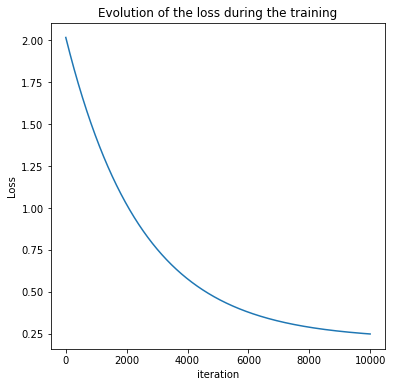

In [ ]:
def plot_loss(loss_list):
    plt.figure(figsize=(6, 6))
    step = np.arange(1, len(loss_list) + 1)
    plt.plot(step, loss_list)
    plt.title("Evolution of the loss during the training")
    plt.xlabel("iteration")
    plt.ylabel("Loss")
    plt.show()

plot_loss(loss)

In [ ]:
def predict(X, w):
  
    y_hat = X @ w
  
    return y_hat
    

In [ ]:
expected_value = predict(X_train, w)
print(expected_value)


[1.11723846 1.18568637 1.39463444 ... 1.0605393  1.2796095  1.18455682]


### K-Folding Stuff

In [ ]:
def k_fold_indices(num_examples: int, k: int = 4) -> List[Tuple[np.ndarray, np.ndarray]]:
    indices = np.arange(num_examples)
    split_size = num_examples // k
    val_indices = [indices[k * split_size : (k + 1) * split_size] for k in range(k)]
    both_indices = [(np.delete(indices, val_ind), val_ind) for val_ind in val_indices]
    return both_indices


In [ ]:
 def GradientDescentK(X: np.ndarray,
                                            y: np.ndarray,
                                            iters: int = 100000,
                                            alpha: float = 0.001,
                                            loss_freq: int = 0,
                                            k: int = 4) -> float:
  
    val_losses = []
    w = np.zeros((X_train.shape[1], ))

    for train_index, val_index in k_fold_indices(X.shape[0] , k):
        
        w, loss = gradient_descent(X[train_index], y[train_index], w, alpha, iters)
        val_losses.append(mse_loss(X[val_index], y[val_index], w))

    return np.mean(val_losses)

In [ ]:
"""alpha = [0.01, 0.001, 0.0001]
for a in alpha:
    iters = int(10 // a)
    low = []
    low.append(GradientDescentK(X_train, y_train, iters, a))
print(low)"""



    
    


'alpha = [0.01, 0.001, 0.0001]\nfor a in alpha:\n    iters = int(10 // a)\n    low = []\n    low.append(GradientDescentK(X_train, y_train, iters, a))\nprint(low)'

helpers.plot_loss(loss)- predict the collapse capacities of a building, given an earthquake, the data which is given to us: - metrics of ground mothing intensity

PGA(peak ground acceleration) does not take into account the dynamic response of building- so use Sa(T) (spectral acceleration)- describes what buildings with different periods will experience. =1000 ground motion of earthquakes.

Collapse capacity: value of the smallest spectral acceleration of a ground motion at the fundamental period of the structure which will cause the structure to collapse.

 w1 * (1.3) + w2*(da5_75) + w3*(da5_95) + w4*(fiv3) + w5*(sa_ratio) = sat1_col

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=493ee647-e437-4c81-80f8-96d4eefd9c39' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>